In [205]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn import metrics

warnings.filterwarnings('ignore')

In [206]:
#importing data
data = pd.read_excel('ENB2012_data.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


In [6]:
#Describing the target variable
data['Y2'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Y2, dtype: float64

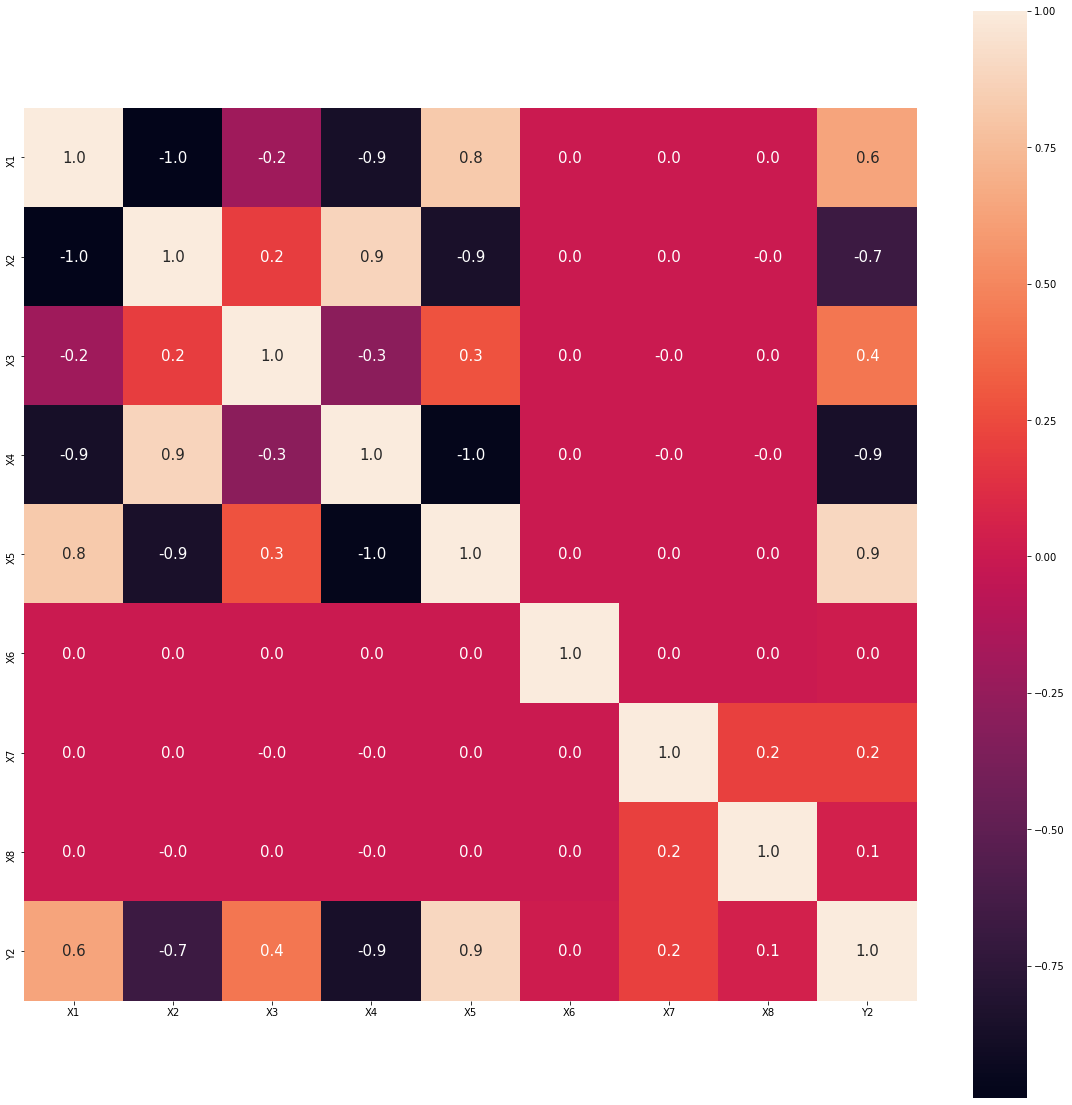

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

In [26]:
#checking missing values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y2    0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y2      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [61]:
x = data.drop('Y2',axis = 1)
y = data.iloc[:,-1]

In [62]:
#Creating the train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
print('Number of amples in training data:',len(x_train))
print('Number of amples in training data:',len(x_test))


Number of amples in training data: 537
Number of amples in training data: 231


In [129]:
from sklearn.linear_model import RidgeCV

In [95]:
ridge = Ridge()

In [86]:
from sklearn.metrics import mean_squared_error as MSE

In [148]:
Ridge_model = RidgeCV(cv = 5)
Ridge_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [159]:
y_train_pred_ridge = Ridge_model.predict(x_train)
y_test_pred_ridge = Ridge_model.predict(x_test)


In [101]:
from sklearn.metrics import mean_squared_error as MSE

In [184]:
ridge_mse_test = MSE(y_test,y_test_pred_ridge)
print ("Ridge MSE :",Ridge_mean_sqr_error)

Ridge MSE : 10.811431240670979


In [199]:
ridge_mse_train = MSE(y_train,y_train_pred_ridge)
print ("Ridge MSE :",Ridge_mean_sqr_error)

Ridge MSE : 10.811431240670979


In [137]:

from sklearn.linear_model import LassoCV

In [162]:
Lasso_model = LassoCV(cv = 5)
Lasso_model.fit(x_train,y_train)


LassoCV(cv=5)

In [151]:
Lasso_model.alpha_

0.5540918637232156

In [163]:
y_train_pred_lasso = Lasso_model.predict(x_train)
y_test_pred_lasso = Lasso_model.predict(x_test)

In [193]:
lasso_mse_test = MSE(y_test,y_test_pred_lasso)
print ("Lasso MSE :",Lasso_mean_sqr_error)

Lasso MSE : 15.308320624384178


In [183]:
lasso_mse_train = MSE(y_train,y_train_pred_lasso)
print ("Lasso MSE :",Lasso_MSE)

Lasso MSE : 17.06090401405478


In [69]:
lasso.score(x_test, y_test)

0.8966542559511408

In [168]:
elastic_model = ElasticNetCV(cv = 5)
elastic_model.fit(x_train,y_train)

ElasticNetCV(cv=5)

In [170]:
y_train_pred_elastic = elastic_model.predict(x_train)
y_test_pred_elastic = elastic_model.predict(x_test)


In [186]:
elastic_mse_test = MSE(y_test,y_test_pred_elastic)
print ("elastic MSE :",elastic)

elastic MSE : 19.461212131893298


In [187]:
elastic_mse_train = MSE(y_train,y_train_pred_elastic)
print ("elastic MSE :",elastic)

elastic MSE : 19.461212131893298


In [203]:
data = [['Ridge Regression',ridge_mse_test,ridge_mse_train], ['Lasso regression',lasso_mse_test,lasso_mse_train], ['Elastic Net regression',elastic_mse_test,elastic_mse_train]]
df = pd.DataFrame(data,columns = ['model', 'mse_test','mse_train'])

In [204]:
df

,model,mse_test,mse_train
0,Ridge Regression,9.432090,10.811431
1,Lasso regression,15.308321,17.060904
2,Elastic Net regression,18.242941,19.461212


#From the above table we can observe that the the value for mean square error in ridge regression model is the lowest of all three.Thus we can conclude that the ridge regression model is the most optimum model.